# Gibbs Sampling

## Part 1

‫روش نمونه‌برداری گیبز روشی برای نمونه‌برداری از توزیع‌های چندمتغیره است.
این روش زمانی کاربرد دارد که نمونه‌برداری از توزیع توام متغیرها
$P(x, y)$
 دشوار بوده و نمونه‌برداری از توزیع شرطی آن‌ها
 یعنی
 $P(x|y)$
 و
 $P(y|x)$
  ساده‌تر است.

**روش (در حالت دو متغیره)**

‫روش نمونه‌برداری به این صورت است که اول یک مقدار اولیه به طور رندم برای $x$ و $y$ انتخاب می‌شود.
پس از آن در هر مرحله به نوبت یکی از متغیرها ثابت نگه داشته شده و متغیر دیگر از توزیع شرطی نمونه‌برداری می‌شود.
هر نمونه‌ی جدید بعد از نمونه‌برداری هر دو متغیر به دست می‌آید و این فرایند تا زمان رسیدن به تعداد دلخواه تکرار می‌شود.
نمونه‌های به دست آمده طی این فرایند تشکیل یک زنجیره‌ی مارکف می‌دهند چرا که هر نمونه فقط به توزیع نمونه‌ی قبلی وابسته است.

در حالت بیشتر از دو متغیره هم کار مشابهی انجام می‌دهیم. در هر مرحله یکی از متغیرها نمونه‌برداری می‌شود و سایر متغیرها ثابت فرض می‌شوند.

## Part 2


We have: 

\[
\begin{split}
P(Y, X)& =  \frac{1}{Z} exp\bigg(
 \sum_{i=1}^{N} \sum_{j=1}^{M}   \big( \eta x_{ij} y_{ij} + \beta  \sum_{i', j' \in N(ij)}  y_{ij} y_{i'j'} \big)
\bigg)
\end{split}
\]

Prove:
\[
\begin{split}
P(y_{ij} = 1 | y_{N(ij)}, x_{ij}) & = \frac{1}{1 + exp(-2w_{ij})} \\
\text{where } w_{ij} &=\eta x_{ij} + \beta  \sum_{ N(ij)}  y_{N(ij)} 
\end{split}
\]

Solution:
\[
\begin{split}
P(y_{ij} = 1 | y_{N(ij)}, x_{ij}) & = \frac{ P(y_{ij} = 1 , y_{N(ij)}, x_{ij}) }{P(y_{N(ij)}, x_{ij}) }
\\
& = \frac{ P(y_{ij} = 1 , y_{N(ij)}, x_{ij}) }{P(y_{ij} = -1, y_{N(ij)}, x_{ij})  + P(y_{ij} = 1, y_{N(ij)}, x_{ij}) }
\\
& = \frac{ 
	\frac{1}{Z} exp\bigg(
\eta	\big( x_{ij} y_{ij} + \beta  \sum_{i', j' \in N(ij)}  y_{ij} y_{i'j'} \big)
	\bigg)
}{
	\frac{1}{Z} exp\bigg(
\eta \big( x_{ij} y_{ij} + \beta  \sum_{i', j' \in N(ij)}  y_{ij} y_{i'j'} \big)
\bigg)
 + 
	\frac{1}{Z} exp\bigg(
\eta \big( x_{ij} y_{ij} + \beta  \sum_{i', j' \in N(ij)}  y_{ij} y_{i'j'} \big)
\bigg)
}
\\
& = \frac{ 
	\frac{1}{Z} exp\bigg(
	\eta	\big( x_{ij} + \beta  \sum_{i', j' \in N(ij)}   y_{i'j'} \big)
	\bigg)
}{
	\frac{1}{Z} exp\bigg(
	\eta \big( x_{ij}  + \beta  \sum_{i', j' \in N(ij)}  y_{i'j'} \big)
	\bigg)
	+ 
	\frac{1}{Z} exp\bigg(
	\eta \big( - x_{ij} - \beta  \sum_{i', j' \in N(ij)}  y_{i'j'} \big)
	\bigg)
}
\\
& = \frac{ 
exp (w_{ij} )
}{
exp (w_{ij} )
	+ 
 exp (- w_{ij} )
}
\\
& = \frac{ 
1
}{
	1
	+ 
	exp (- 2 w_{ij} )
}
\end{split}
\]

### Part3

In [ ]:
from PIL import Image
import numpy as np

img_path = 'img_noisy.png'

initial_img = Image.open(img_path)
initial_img.load()
    
initial_img_np = np.asarray(initial_img, dtype="int32")

IMG_SIZE = initial_img_np.shape[:2]

In [ ]:
# Convert rgba image to {-1, 1} values

noisy_img = np.ones((IMG_SIZE[0], IMG_SIZE[1]))

for i in range(IMG_SIZE[0]):
    for j in range(IMG_SIZE[1]):
        if initial_img_np[i][j][0] == 255:
            noisy_img[i][j] = -1

noisy_img

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ...,  1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

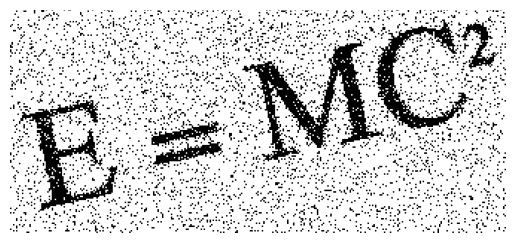

In [165]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(noisy_img * -1, cmap='gray')
plt.axis('off')
plt.show()

In [173]:
eta = 1
beta = 1
n_iterations = 200 

initial_X = noisy_img

In [174]:
# Sample y based on X and y neighbors using the formula
# we get above

def sample_Y(X, Y, i, j):
    neigh_sum = 0
    if i - 1 >= 0:
        neigh_sum += Y[i-1][j]
    if i+1 < IMG_SIZE[0]:
        neigh_sum += Y[i+1][j]
    if j - 1 >= 0:
        neigh_sum += Y[i][j-1]
    if j+1 < IMG_SIZE[1]:
        neigh_sum += Y[i][j+1]
    
    w = eta * X[i, j] + beta * neigh_sum

    # the probability we calculated above
    p = 1.0 /  (1.0 + np.exp(-2 * w))

    # get a random value and set sample:
    # value < p: y = 1
    # value > p: y = -1
    value = np.random.rand()
    new_y = 1 if value < p else -1
    return new_y

In [175]:
# Perform Sampling

# Use random initialization as first sample
y = np.random.choice([-1, 1], (IMG_SIZE[0], IMG_SIZE[1]))

# `count` store count of times that a pixel get a value of 1
count = np.zeros((IMG_SIZE[0], IMG_SIZE[1])) 

for n in range(n_iterations):
    for i in range(IMG_SIZE[0]):
        for j in range(IMG_SIZE[1]):
            y[i][j] = sample_Y(initial_X, y, i, j)
    count += y == 1 

In [176]:
# Create new image using `count` array.
# If the probability of pixel being 1 in samples (`count/n_iterations`) 
# is greater, set pixel to 1, otherwise set pixel to -1

new_img = np.zeros((IMG_SIZE[0], IMG_SIZE[1]))
for i in range(IMG_SIZE[0]):
    for j in range(IMG_SIZE[1]):
        new_img[i][j] = 1 if count[i][j] / n_iterations > 0.5 else -1

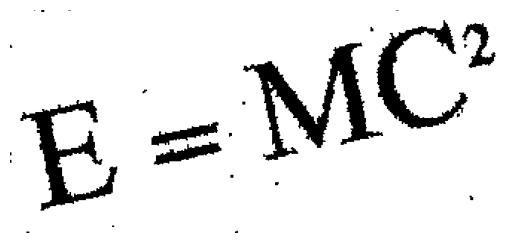

<Figure size 640x480 with 0 Axes>

In [177]:
plt.imshow(new_img*-1, cmap='gray')
plt.axis('off')
plt.show()
plt.savefig('new_image.png')